# Midterm - Take Home 
## Nick Bias
### 5/4/22
### Libraries 

In [1]:
import pandas as pd
import numpy as np

# For Boosting 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# For Comparision Models
# compare standalone models for binary classification
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

# For splitting data into training and testing 
from sklearn.model_selection import train_test_split
# example of calculate the mean absolute error
from sklearn.metrics import accuracy_score

# For Evaluations 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

# So results are same when re-run
import random
random.seed(10)

In [2]:
# Read in Datasets and join them together
data1 = pd.read_csv("Data/Week5_Midterm/data1.csv")
data2 = pd.read_csv("Data/Week5_Midterm/data2.csv")
survey_data = pd.concat([data1, data2])
survey_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


The Data is filled with String Variables that can be changed to Categorical variables. From there, Dummy variables can be made, depending on how many Factor levels there are. The rest of the data is some form of Numeric. It seems as if 'Inflight wifi service' to 'Cleanliness' are numerical factors. There are only 5 levels. These can most likely be left the same. 

In [3]:
survey_data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

I am confused about 'Leg room service'. As far as I am aware, there is no service. Some seats just have more leg room than others. They could possibly add a variable for how much leg room the customers had in inches. This way we could find which ideal sizes lead to happy customers. 

'Inflight entertainment' is also very vague. Different customers like different things. Maybe  we could add a new categorical variable that could describe the type of inflight entertainment. If it is usually movies, then the genre. Or where the screen is located (in front of every seat or every certain amount of rows).

We could possible add a new variable for how full the flight was. This way we can see if happy customers were just on less busy planes or not. 

We could also add a new variable for Overall Flight Satisfaction. This way we can see how the customers are rating the overall flight, along with every other rating. 

# Exploratory Data Analysis 

In [4]:
survey_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Age 
- We can see that the Average Age is about 40 years old.
- The minimum age is 7, while the maximum is 80.

Flight Distance 
- The average distance is 1190 miles travelled 
- The minimum distance is 31, while the maximum is 4983.

Departure Delay in Minutes 
- The average delay is 14 minutes 
- The minimum delay is 0, while the maximum is 1592 minutes or 26.5 hours.

Arrival Delay in Minutes 
- the average delay is 14 minutes 
- The minimum delay is 0, while the maximum is 1584 minutes or 26.5 hours.

These are very long delays. We should investigate why these flights were delayed so long. Longer delays would most likely lead to less satisfied customers. We could possibly add a variable for if their was a delay, what was the reason. This way we can track what is wrong with our flights.

The other numeric columns are factor levels so they do not need to be examined the same way.

In [5]:
survey_data["Gender"].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

The Gender Ratio of the dataset is fairly even, with the majority being Female. Since Gender is not a binary, there could be an "Other' Category. 

In [6]:
survey_data["Customer Type"].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

There are only two types of Customers and a majority are Loyal. I wonder what loyal and disloyal mean in terms of these customers. Sometimes people cannot always take the same Airline for their destinations or cannot afford it. Maybe there could be a possible Neutral Customer category, for those that are unaware of the Airline loyalty. 

In [7]:
survey_data["Type of Travel"].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

There are only two types of fliers, Personal and Business. Most travel is Business. In Fact, Business travel is more than double Personal travel. I believe there could be a third category for Vacation travel. This may fall under Personal, but Fliers could be flying for other personal reasons besides vaction. 

In [8]:
survey_data["Class"].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

This is the first categorical variable to have more than 2 levels. Only 7% of the Fliers are Eco Plus, while Business once again makes up the majority of travel. 

In [9]:
survey_data["satisfaction"].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

More than 56% of all Fliers were either Neutral or Dissatisfied. Considering this is a response variable, I believe Neutral or Dissatisfied should not be grouped together. They should be split. We want to know why a customer is neutral and dissatisfied. This helps us determine what is wrong and helps us fix it. I understand that we only care about the Satisfied customers, but we lose information this way.

Since this is the target class, we can see that it is not extremely unbalanced, so Undersampling will not be needed

In [10]:
survey_data["Inflight wifi service"].value_counts()

2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64

In [11]:
survey_data["Departure/Arrival time convenient"].value_counts()

4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64

I will not go into all Numeric Factor Variables as there are a lot that would clog up this report. 

Overall, the Categorical Variables seem to be evenally ballanced, which is good for predictive models. 

# Data Cleaning

In [12]:
# Drop NAs from dataset (only 393 rows were lost)
survey = survey_data.dropna()
survey['Gender'] = survey['Gender'].eq('Male').mul(1)
survey['Customer Type'] = survey['Customer Type'].eq('Loyal Customer').mul(1)
survey['Type of Travel'] = survey['Type of Travel'].eq('Business travel').mul(1)
survey['satisfaction'] = survey['satisfaction'].eq('neutral or dissatisfied').mul(1)

# Creating Dummy Variables for the variable that has more than 2 categorical responses
dummies = pd.get_dummies(survey['Class'])

# Joins the Dataset with the dummy variables 
survey = pd.concat([survey, dummies], axis=1)

# Drops Columns with Dummy variables 
survey = survey.drop(['Class', 'Unnamed: 0', 'id'], axis = 1)

# Resets Index
survey = survey.reset_index(drop=True)

survey

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,0,1,52,1,160,5,4,3,4,3,...,5,2,5,5,50,44.0,0,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,0,1,0,0
2,1,0,20,1,192,2,0,2,4,2,...,3,2,2,2,0,0.0,1,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,0,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,23,1,192,2,1,2,3,2,...,4,2,3,2,3,0.0,1,0,1,0
129483,1,1,49,1,2347,4,4,4,4,2,...,5,5,5,4,0,0.0,0,1,0,0
129484,1,0,30,1,1995,1,1,1,3,4,...,4,5,5,4,7,14.0,1,1,0,0
129485,0,0,22,1,1000,1,1,1,5,1,...,1,5,4,1,0,0.0,1,0,1,0


In [13]:
survey["satisfaction"].value_counts()

1    73225
0    56262
Name: satisfaction, dtype: int64

This is the same as before it was clean, so it is safe to say the data was correctly cleaned.

## Splitting Prediction Variable from dataset
- X = Dataset with all Independent Variables 
- y = The Dependent Variable of Customer Satisfaction 

In [14]:
y = survey["satisfaction"]
X = survey.drop("satisfaction", axis=1)

In [15]:
y.value_counts()

1    73225
0    56262
Name: satisfaction, dtype: int64

In [16]:
# Splitting data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Stacking Models to create Baseline Metrics to evaluate with

In [17]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', BaggingClassifier(base_estimator=LogisticRegression())))
    #level0.append(('knn', BaggingClassifier(base_estimator=KNeighborsClassifier())))
    level0.append(('tree', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
    level0.append(('forest', BaggingClassifier(base_estimator=RandomForestClassifier())))
    #level0.append(('svm', BaggingClassifier(base_estimator=SVC())))
    level0.append(('bayes', BaggingClassifier(base_estimator=GaussianNB())))
    level0.append(('adaboost', BaggingClassifier(base_estimator=AdaBoostClassifier())))
    level0.append(('gradboost', BaggingClassifier(base_estimator=GradientBoostingClassifier())))
    level0.append(('xgboost', BaggingClassifier(base_estimator=XGBClassifier())))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, passthrough = False)
    return model
# passthrough is used for the stacking to take the og dataset instead of just the other model results

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    #models['knn'] = KNeighborsClassifier()
    models['tree'] = DecisionTreeClassifier()
    models['forest'] = RandomForestClassifier()
    #models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['adaboost'] = AdaBoostClassifier()
    models['gradboost'] = GradientBoostingClassifier()
    models['xgboost'] = XGBClassifier()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()

In [ ]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.791 (0.015)
>tree 0.947 (0.002)
>forest 0.963 (0.002)
>bayes 0.849 (0.003)
>adaboost 0.927 (0.002)
>gradboost 0.942 (0.002)
>xgboost 0.964 (0.002)


As we can see the models are performing rather well. I did not let it finish with the Stacking model because it was taking too long to run, even after simplifying the model. 

We can see that the best models are The XG Boost and Random Forest. Both of these models achieved accuracies of over 95%. Most of the other models were able ot achieve accuracies over 90%. Only the Logistic Regression and Naive Bayes did not get over 85%. 

I started off with Bagging the models to try to boost model performance. However, this was taking so long, so I changed 'passthrough = False' so the stacked model will just look at the previous model outputs instead of looking at the whole dataset. I also made the level 1 Stacked model be a Logistic Regression model. Both of these steps were taken to reduce compute time, as the final stacked model would take too long to run. This still took to long to run though.

I decided to run stacking again without bagging the models to see if would run faster and if the results would change at all. To my surprise, the models had the exact same Accuracies and Standard Deviation Scores. I dropped this from the report to have less clutter. Bagging is used to reduce variance within a noisy dataset. This may be because there is no variance in the data. I will run a Levene Test next to test the variance in the Data.

In [18]:
# Runs A Levene Test to test variance in Customer Satisfaction
from scipy.stats import levene
a = levene(y_test, y_train)
b = levene(y_test, y_train, center="mean")
c = levene(y_test, y_train, center="trimmed")
print(a)
print(b)
print(c)

LeveneResult(statistic=0.3039986613017821, pvalue=0.5813873622704643)
LeveneResult(statistic=1.1947873642607052, pvalue=0.2743680443711728)
LeveneResult(statistic=1.3390838470191218, pvalue=0.2471979700749689)


We can see ethat the P-value for each method does not ever drop below 0.05. This means we do not have sufficient evidence to say that the variance in Customer Satisfaction is significantly different. Because of this Bagging models will not be used.

Next I will examine the Precision and Recall (instead of just the accuracy) of the models to see which is the best at classifying Customer Satisfaction. 

## Checking Model Accuracy, Recall and Precision

We will be looking at the:
- Precision or proportion of positive identifications (Satisfied Customer) that are actually correct 
- Recall or proportion of actual positives (Satisfied Customer) that were identified correctly

In [19]:
# This creates a Function that will Evalutate the models, by looking at Accuracy, Recall, Precision and ROC Curve
# This will be helpful in seeing how well the target class is being predicted 
def model_eval(model, X_test, y_test):
    assert len(X_test) == len(y_test), "X_test and y_test are not equal in size."
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[::, 1]
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_pred, y_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC: {round(auc, 3)}')
    plt.legend()
    plt.show()

[[ 8354  2938]
 [ 2649 11957]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     11003
           1       0.82      0.80      0.81     14895

    accuracy                           0.78     25898
   macro avg       0.78      0.78      0.78     25898
weighted avg       0.79      0.78      0.78     25898



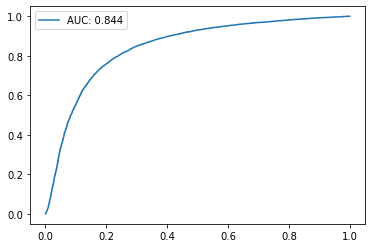

In [20]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
model_eval(log_model, X_test, y_test)

The Logistic Regression model did not perform too well. It's accuracy did not reach above 80%. Its precision is under 80% as well, and its recall is only 83%. Overall, this model is alright, but others should be explored.

[[ 7587  3705]
 [ 2760 11846]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70     10347
           1       0.81      0.76      0.79     15551

    accuracy                           0.75     25898
   macro avg       0.74      0.75      0.74     25898
weighted avg       0.76      0.75      0.75     25898



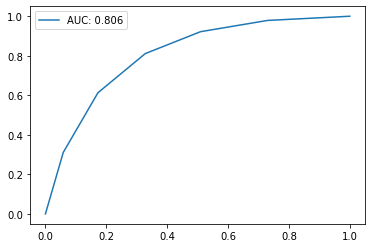

In [21]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
model_eval(knn_model, X_test, y_test)

The KNN Model perfromed slightly worse than the Logistic Model. It has a higher Precision, but its recall and accuracy are much worse. This model will not be explored further.

[[10644   648]
 [  700 13906]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11344
           1       0.95      0.96      0.95     14554

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



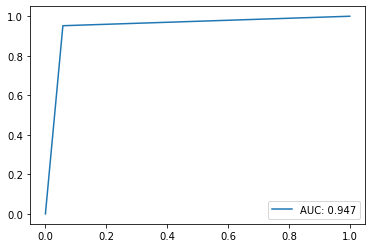

In [22]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
model_eval(tree_model, X_test, y_test)

The base Decision Tree model was able to achieve an accuracy, precision and recall of 95%. This are very good results and it means the model is performing well. This model should be explored more later. 

[[10622   670]
 [  314 14292]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10936
           1       0.98      0.96      0.97     14962

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



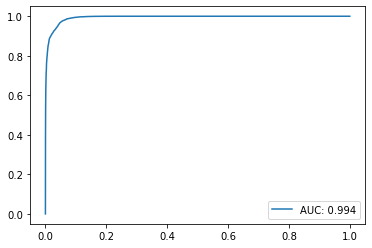

In [23]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
model_eval(forest_model, X_test, y_test)

The Random Forest Model outperformed the Decision Tree. It's precision was 98%, meaning its is 98% correct with identifying Customer Satisfaction. Its recall is 96%, meaning that 96% of actual positives customer satisfactions were identified correctly. Overall, the accuracy is only 1% better than the decision tree model, but it is still better. This Model will be explored further. 

In [24]:
# Takes too Long to Run
#svc_model = SVC()
#svc_model.fit(X_train, y_train)
#model_eval(svc_model, X_test, y_test)

[[ 9116  2176]
 [ 1768 12838]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     10884
           1       0.88      0.86      0.87     15014

    accuracy                           0.85     25898
   macro avg       0.84      0.85      0.84     25898
weighted avg       0.85      0.85      0.85     25898



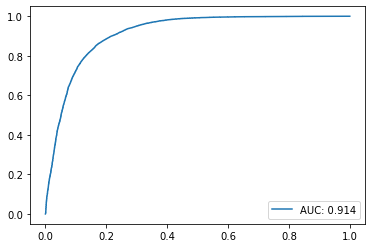

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
model_eval(nb_model, X_test, y_test)

[[6772 4520]
 [5747 8859]]
              precision    recall  f1-score   support

           0       0.60      0.54      0.57     12519
           1       0.61      0.66      0.63     13379

    accuracy                           0.60     25898
   macro avg       0.60      0.60      0.60     25898
weighted avg       0.60      0.60      0.60     25898



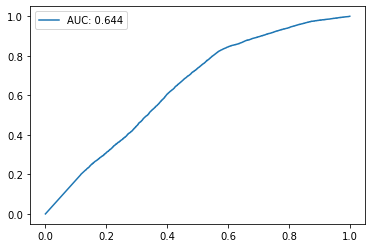

In [26]:
nb_model = ComplementNB()
nb_model.fit(X_train, y_train)
model_eval(nb_model, X_test, y_test)

[[ 8920  2372]
 [ 3517 11089]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75     12437
           1       0.76      0.82      0.79     13461

    accuracy                           0.77     25898
   macro avg       0.77      0.77      0.77     25898
weighted avg       0.77      0.77      0.77     25898



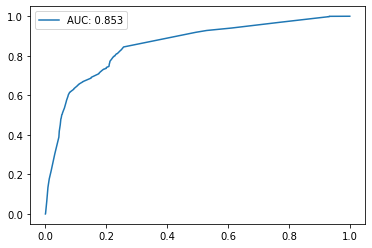

In [27]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
model_eval(nb_model, X_test, y_test)

Overall, the Naive Bayes Models did not perform as well as previous models. Complement was the worst performing, while Gaussian was the best. In fact, Gaussian was the only Naive Bayes model to have an accuracy and precision above 85%. These models will not be examined further as there are better performing models. 

[[10218  1074]
 [  863 13743]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11081
           1       0.94      0.93      0.93     14817

    accuracy                           0.93     25898
   macro avg       0.92      0.92      0.92     25898
weighted avg       0.93      0.93      0.93     25898



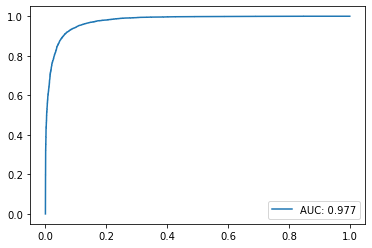

In [28]:
adab_model = AdaBoostClassifier()
adab_model.fit(X_train, y_train)
model_eval(adab_model, X_test, y_test)

The Adaptive Boost Model performs well, with an overall acuray of 93%. However, it is not as good as the Decision tree or Randome Forest models. 

[[10355   937]
 [  618 13988]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10973
           1       0.96      0.94      0.95     14925

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



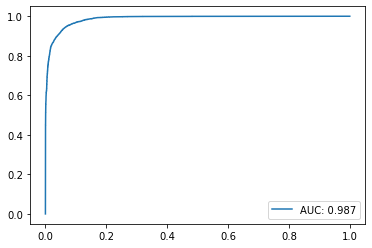

In [29]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)
model_eval(grad_model, X_test, y_test)

The Gradient Boosted Model performs well, with an overall accuracy of 94%. This is better than the Adaptive Boost model, but only by a 2 percent. Overall, there are better models to predict with. 

[[10659   633]
 [  304 14302]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10963
           1       0.98      0.96      0.97     14935

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



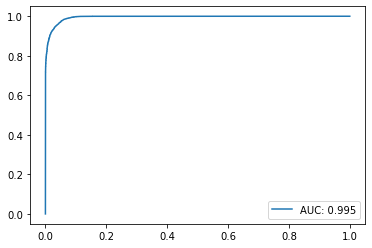

In [30]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
model_eval(xgb_model, X_test, y_test)

The XG Boost Model is performing as well as the Random Forest Model. The only difference is AUC is 0.995 for the XG Boost, while the Randome Forest AUC is 0.994. This is an incredibly small difference, so overall, these Models are very similar. This means that the Random Forest and XG Boost Models are the best models for predicting Customer Satisfaction. 

## Final Model

I will now Stack all the models that achieved an Accuracy, Precision, and Recall metrics over 90%. This will hopefully make a superior model.

In [37]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('tree', DecisionTreeClassifier()))
    level0.append(('forest', RandomForestClassifier()))
    level0.append(('adaboost', AdaBoostClassifier()))
    level0.append(('gradboost', GradientBoostingClassifier()))
    level0.append(('xgboost', XGBClassifier()))
    # define meta learner model
    level1 = DecisionTreeClassifier()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, passthrough = False)
    return model
# passthrough is used for the stacking to take the og dataset instead of just the other model results

# get a list of models to evaluate
def get_models():
    models = dict()
    models['tree'] = DecisionTreeClassifier()
    models['forest'] = RandomForestClassifier()
    models['adaboost'] = AdaBoostClassifier()
    models['gradboost'] = GradientBoostingClassifier()
    models['xgboost'] = XGBClassifier()
    models['stacking'] = get_stacking()
    return models

# get the models to evaluate
models = get_models()

[[10700   592]
 [  301 14305]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11001
           1       0.98      0.96      0.97     14897

    accuracy                           0.97     25898
   macro avg       0.96      0.97      0.96     25898
weighted avg       0.97      0.97      0.97     25898



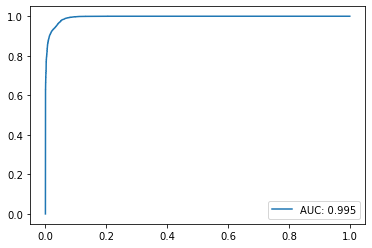

In [39]:
stack = models['stacking']
stack = stack.fit(X_train, y_train)
model_eval(stack, X_test, y_test)

I first tried to stack just the Random Forest and XG Boost Models as they were the only model to achieve accuracies above 95%. However, the stacked model had almost the same measurements. This led me to stack all models above 90% accuracy. 

To my surprise, the Model accuracy is 97%. This only went up by 1%, compared to the XG Boost and Random Forest Models, which had an accuracy of 96%. The Precision is 98%, meaning its is 98% correct with identifying Customer Satisfaction. Its recall is 96%, meaning that 96% of actual positives customer satisfactions were identified correctly. These were the same Precision and Recall scores that the Random Forest and XG Boost Models. 
The other improvement in this Stacked model is the Precision for Non-Satisfied Customers. It is 95%. This is a 1% increase compared to the Random Forest and XG Boost Models.

Overall, the Stacked Model is an imporved model, just not by much.

# Feature Importance

I first tried to run this Feature Importance code with the Stacked Model, however, it is not able to work with a Stacking Classifier. Because of this, I decided to look at the Feature Importance for the 2 Models that performed the best, ie the Random Forest and XG Boost Models. These two models had the closest performance metrics to the Stacked model, so their feature importance should reflect the Stacked Models Feature Importance.

The below figures show the features ranked according to the explained variance each feature contributes to the model. In this case the features are plotted against their relative importance, that is the percent importance of the most important feature. So the larger the coefficient is, the more influence it has on a prediction.

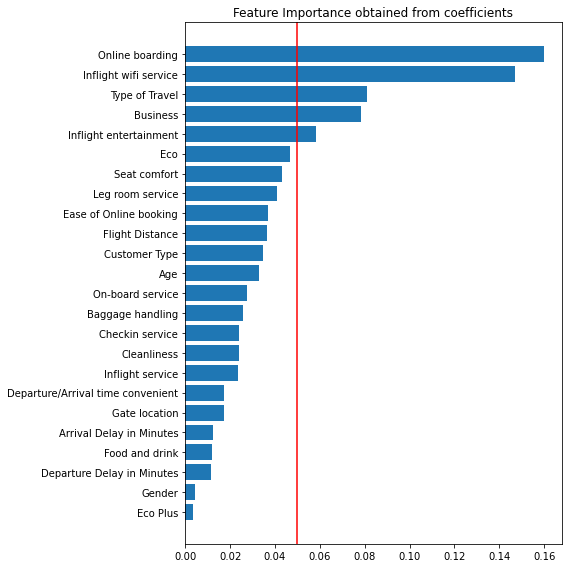

In [43]:
# Get Feature importance data using feature_importances_ attribute

feature_importance = forest_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance obtained from coefficients')
result = permutation_importance(forest_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.axvline(x = 0.05, color = 'r')
fig.tight_layout()
plt.show()

The Top 5 Most Important Features for the Random Forest Model were:
- Online Boarding
- Inflight Wifi Service
- Type of Travel was for Business
- If they were in Business Class
- Inflight entertainment

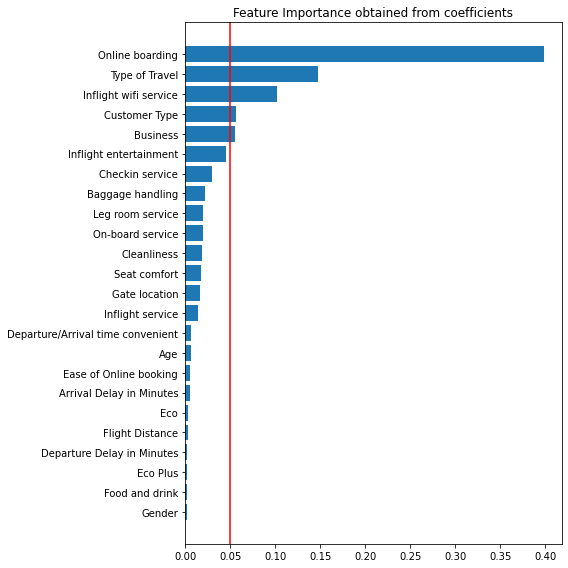

In [42]:
# Get Feature importance data using feature_importances_ attribute

feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance obtained from coefficients')
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.axvline(x = 0.05, color = 'r')
fig.tight_layout()
plt.show()

The Top 5 Most Important Features for the XG Boost Model were:
- Online Boarding
- Type of Travel was for Business
- Inflight Wifi Service
- If they were a Loyal Customer
- If they were in Business Class

From these 2 Models, we can see that they share many important features. 

Both Models rank Online Boarding as the most important feature. Online Boarding is the process in which passengers confirm their presence on a flight via the Internet and typically print their own boarding passes. So the easier this is to do, the more satisfied the customer will be. We could simiplify the Online Boarding process. This way it will be easier for customers to checkin online. If they still have trouble we could have chatbots to help them through the process online. 

Business Travel was the second most important feature for the XG Boost model, while it was third for Random Forest. This means if the Type of Travel is for Business, the customers will be more satisfied. Personal travel was the referent variable. We should target more Businesses, and offer discounts or extra miles to people from the same businesses travelling together. 

Inflight Wifi Service was the second most important feature for the Random Forest, while it was third for XG Boost model. This means that the better the wifi customers have while flying with us, the higher their satisfaction. This may be due to everyone having some kind of wifi enabled device now. People rather be on their own devices that watch the inflight entertainment. Maybe we could add some charging ports under each seat so customers can continue using their devices for longer flights.

Business Class was the fourth most important feature for the Random Forest, while it was fifth for XG Boost model. This means that Customers traveling in the Business class of the plane, were more satisfied than customers in the other classes. We could possibly offer discounts or extra miles for customers flying in Business Class. This will help create more demand for these kinds of seats. 

The Random Forest Model's fifth most important feature was Inflight Entertainment (Sixth for XGB). The better the inflight enterainment, the more satisfied customers will be. Inflight Entertainment should be screens in front of each seat. This way Customers do not have to watch the main feature (Movie) offered in the flight. They will have a range of options to choose from. 

The fourth most important feature for the XG Boost Model was Customer Loyality. This means the more loyal a customer is to the airline, the more satisfied they will be. We should offer discounts or extra miles to our Loyal Customers. This way we will entice them to keep traveling with us, and possible get more customers to travel with us for the benefits. 